Этапы исследования проекта:
1. Общая информация 
2. Предобработка данных
3. Категоризация данных
4. Исследовательский анализ данных
5. Общий вывод

### 1. Общая информация

Прочитаем файл и сохраним его в переменной df_raw, изучим общую информацию

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_raw = pd.read_csv('/datasets/real_estate_data.csv')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 1 columns):
total_images	last_price	total_area	first_day_exposition	rooms	ceiling_height	floors_total	living_area	floor	is_apartment	studio	open_plan	kitchen_area	balcony	locality_name	airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	ponds_around3000	ponds_nearest	days_exposition    23699 non-null object
dtypes: object(1)
memory usage: 185.3+ KB


В первую очередь необходимо разделить столбцы в файле в соответствии с форматом csv

In [4]:
df_raw = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Изучим первые 10 строк для понимания вида и структуры исходного датасета, разделив таблицу на 2 части для удобства чтения

In [5]:
df_raw.loc[:, 'total_images' : 'studio'].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False


In [6]:
df_raw.loc[:, 'open_plan' : 'days_exposition'].head(10)

,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Для ответа на поставленные в проекте вопросы оставим только необходимые столбцы:
1. 'last_price'
2. 'total_area'
3. 'living_area'
4. 'kitchen_area'
5. 'rooms'
6. 'ceiling_height'
7. 'floor'
8. 'floors_total'
9. 'first_day_exposition'
10. 'days_exposition'
11. 'locality_name'
12. 'cityCenters_nearest'

In [7]:
df = df_raw[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'ceiling_height', 'floor', 
             'floors_total', 'first_day_exposition', 'days_exposition', 'locality_name', 'cityCenters_nearest']]
df.head()

,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floor,floors_total,first_day_exposition,days_exposition,locality_name,cityCenters_nearest
0,13000000.0,108.0,51.0,25.0,3,2.70,8,16.0,2019-03-07T00:00:00,NaN,Санкт-Петербург,16028.0
1,3350000.0,40.4,18.6,11.0,1,NaN,1,11.0,2018-12-04T00:00:00,81.0,посёлок Шушары,18603.0
2,5196000.0,56.0,34.3,8.3,2,NaN,4,5.0,2015-08-20T00:00:00,558.0,Санкт-Петербург,13933.0
3,64900000.0,159.0,NaN,NaN,3,NaN,9,14.0,2015-07-24T00:00:00,424.0,Санкт-Петербург,6800.0
4,10000000.0,100.0,32.0,41.0,2,3.03,13,14.0,2018-06-19T00:00:00,121.0,Санкт-Петербург,8098.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 12 columns):
last_price              23699 non-null float64
total_area              23699 non-null float64
living_area             21796 non-null float64
kitchen_area            21421 non-null float64
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floor                   23699 non-null int64
floors_total            23613 non-null float64
first_day_exposition    23699 non-null object
days_exposition         20518 non-null float64
locality_name           23650 non-null object
cityCenters_nearest     18180 non-null float64
dtypes: float64(8), int64(2), object(2)
memory usage: 2.2+ MB


### Вывод

В результате выполненных шагов была получена следующая информация:
1. Исходный датасет содержит 22 столбца и 23699 строк. Среди столбцов 17 имеют численный тип (float64 и int64), 3 - строки (object) и 2 булевого типа (bool);
2. Для ответа на поставленные в проекте вопросы из датасета были выделены 12 признаков;
3. Почти все столбцы имеют разное количество пропущенных значений, что, вероятно, связано со спецификой заполнения объявлений о продаже квартир;
4. Данные в строках необходимо привести к общему формату данных. Так, в столбце floor формат записи данных int64, тогда как в floors_total - float64, что может затруднить дальнейшую работу с датасетом;
5. Формат записи значений в столбцах days_exposition и cityCenters_nearest также следует перевести в int64;
6. Формат записи значений в столбце first_day_exposition потребуется перевести в формат datetime.

### 2. Предобработка данных

Проверим датасет на наличие пропусков с помощью метода isnull

In [9]:
df.isnull().sum()

last_price                 0
total_area                 0
living_area             1903
kitchen_area            2278
rooms                      0
ceiling_height          9195
floor                      0
floors_total              86
first_day_exposition       0
days_exposition         3181
locality_name             49
cityCenters_nearest     5519
dtype: int64

Для заполнения пропусков в столбцах living_area и kitchen_area выполним последовательность действий: рассмотрим графики для определения границ групп, сгруппируем строки по total_area, с помощью словаря сделаем таблицу со средними и медианными значениями для каждого параметра и заполним пропуски исходя из медианных значений в каждой из групп

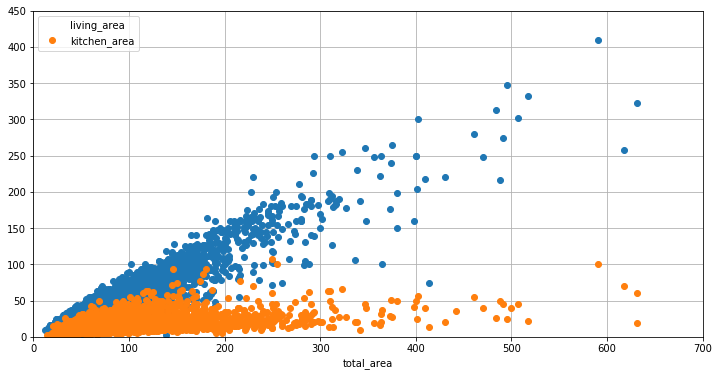

In [10]:
ax = df.plot(x='total_area', y='living_area', style='o', xlim=(0, 700), ylim=(0, 450), grid=True, figsize=(12, 6))
df.plot(x='total_area', y='kitchen_area', style='o', xlim=(0, 700), ylim=(0, 450), grid=True, figsize=(12, 6), ax=ax)

In [11]:
def total_area_grouped(row):
    if row <= 20:
        return 'Менее 20 кв.м.'
    if 20 < row <= 50:
        return '20 - 50 кв.м.'
    if 50 < row <= 80:
        return '50 - 80 кв.м.'
    if 80 < row <= 150:
        return '80 - 150 кв.м.'
    return 'Более 150 кв.м.'
df.loc[:, 'total_area_group'] = df.loc[:, 'total_area'].apply(total_area_grouped)
df.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floor,floors_total,first_day_exposition,days_exposition,locality_name,cityCenters_nearest,total_area_group
0,13000000.0,108.0,51.0,25.0,3,2.70,8,16.0,2019-03-07T00:00:00,NaN,Санкт-Петербург,16028.0,80 - 150 кв.м.
1,3350000.0,40.4,18.6,11.0,1,NaN,1,11.0,2018-12-04T00:00:00,81.0,посёлок Шушары,18603.0,20 - 50 кв.м.
2,5196000.0,56.0,34.3,8.3,2,NaN,4,5.0,2015-08-20T00:00:00,558.0,Санкт-Петербург,13933.0,50 - 80 кв.м.
3,64900000.0,159.0,NaN,NaN,3,NaN,9,14.0,2015-07-24T00:00:00,424.0,Санкт-Петербург,6800.0,Более 150 кв.м.
4,10000000.0,100.0,32.0,41.0,2,3.03,13,14.0,2018-06-19T00:00:00,121.0,Санкт-Петербург,8098.0,80 - 150 кв.м.


In [12]:
area_pivot = df.groupby('total_area_group').agg({'living_area': ['mean', 'median'], 'kitchen_area': ['mean', 'median']})
area_pivot

living_area        kitchen_area       
                        mean median         mean median
total_area_group                                       
20 - 50 кв.м.      20.904275   18.4     8.544067   8.00
50 - 80 кв.м.      37.425867   37.2    10.168180   9.20
80 - 150 кв.м.     58.855282   56.0    15.982373  14.00
Более 150 кв.м.   125.488044  112.0    25.801411  21.21
Менее 20 кв.м.     13.349583   13.5     3.428571   3.00

In [13]:
df.loc[df['total_area_group'] == 'Менее 20 кв.м.', 'living_area'] = df.loc[df['total_area_group'] == 'Менее 20 кв.м.', 'living_area'].fillna(13.5)
df.loc[df['total_area_group'] == '20 - 50 кв.м.', 'living_area'] = df.loc[df['total_area_group'] == '20 - 50 кв.м.', 'living_area'].fillna(18.4)
df.loc[df['total_area_group'] == '50 - 80 кв.м.', 'living_area'] = df.loc[df['total_area_group'] == '50 - 80 кв.м.', 'living_area'].fillna(37.2)
df.loc[df['total_area_group'] == '80 - 150 кв.м.', 'living_area'] = df.loc[df['total_area_group'] == '80 - 150 кв.м.', 'living_area'].fillna(56.0)
df.loc[df['total_area_group'] == 'Более 150 кв.м.', 'living_area'] = df.loc[df['total_area_group'] == 'Более 150 кв.м.', 'living_area'].fillna(112.0)

In [14]:
df.loc[df['total_area_group'] == 'Менее 20 кв.м.', 'kitchen_area'] = df.loc[df['total_area_group'] == 'Менее 20 кв.м.', 'kitchen_area'].fillna(3.00)
df.loc[df['total_area_group'] == '20 - 50 кв.м.', 'kitchen_area'] = df.loc[df['total_area_group'] == '20 - 50 кв.м.', 'kitchen_area'].fillna(8.00)
df.loc[df['total_area_group'] == '50 - 80 кв.м.', 'kitchen_area'] = df.loc[df['total_area_group'] == '50 - 80 кв.м.', 'kitchen_area'].fillna(9.20)
df.loc[df['total_area_group'] == '80 - 150 кв.м.', 'kitchen_area'] = df.loc[df['total_area_group'] == '80 - 150 кв.м.', 'kitchen_area'].fillna(14.00)
df.loc[df['total_area_group'] == 'Более 150 кв.м.', 'kitchen_area'] = df.loc[df['total_area_group'] == 'Более 150 кв.м.', 'kitchen_area'].fillna(21.21)

In [15]:
df.isnull().sum()

last_price                 0
total_area                 0
living_area                0
kitchen_area               0
rooms                      0
ceiling_height          9195
floor                      0
floors_total              86
first_day_exposition       0
days_exposition         3181
locality_name             49
cityCenters_nearest     5519
total_area_group           0
dtype: int64

Перейдем к высоте потолков. Рассмотрим распределение в зависимости от стоимости квартиры. Если будет установлена зависимость между ценой и высотой потолков, то также осуществим группировку и заполним пропуски исходя из принадлежности к одной из категорий. В проитвном случае выполним заполнение медианным значением

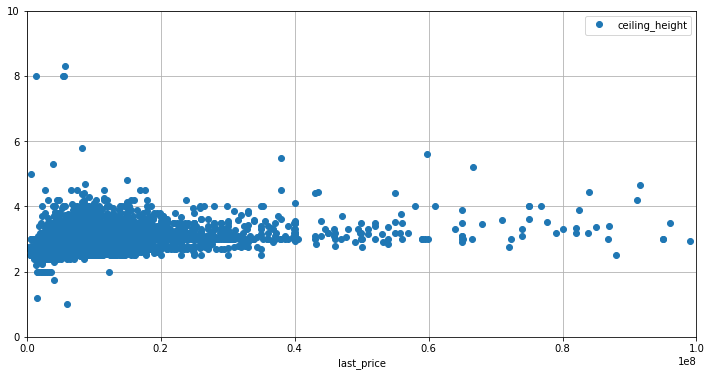

In [16]:
ax = df.plot(x='last_price', y='ceiling_height', style='o', xlim=(0, 100000000), ylim=(0, 10), grid=True, figsize=(12, 6))


Как видно из графика, с ростом цены не наблюдается увеличения высоты потолков, поэтому заменим пропущенные значения в объявлениях на медианное значение датасета

In [17]:
ceiling_median = df['ceiling_height'].median()
df.loc[:, 'ceiling_height'] = df.loc[:, 'ceiling_height'].fillna(ceiling_median)
df.isnull().sum()

last_price                 0
total_area                 0
living_area                0
kitchen_area               0
rooms                      0
ceiling_height             0
floor                      0
floors_total              86
first_day_exposition       0
days_exposition         3181
locality_name             49
cityCenters_nearest     5519
total_area_group           0
dtype: int64

Пропуски в ceiling_height заполнены. Значения в столбцах floors_total (с учетом современной архитектуры) и locality_name возможно охарактеризовать как полностью случайные и составляют менее 1% от датасета, что позволяет от них избавиться с помощью метода dropna

In [18]:
df.dropna(subset=['floors_total', 'locality_name'], inplace=True)
df.isnull().sum()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


last_price                 0
total_area                 0
living_area                0
kitchen_area               0
rooms                      0
ceiling_height             0
floor                      0
floors_total               0
first_day_exposition       0
days_exposition         3171
locality_name              0
cityCenters_nearest     5501
total_area_group           0
dtype: int64

Заменим пропущенные значения в cityCenters_nearest на средние показатели из объявлений в аналогичных городах

In [19]:
range_city = df.pivot_table(index='locality_name', values='cityCenters_nearest', aggfunc='median')

def range_group(row):
    city = row['locality_name']
    to_center = row['cityCenters_nearest']
    if to_center != to_center and city in range_city.index:
        return range_city.loc[city]['cityCenters_nearest']
    else:
        return to_center
df.loc[:, 'cityCenters_nearest'] = df.apply(range_group, axis=1)
df

,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floor,floors_total,first_day_exposition,days_exposition,locality_name,cityCenters_nearest,total_area_group
0,13000000.0,108.00,51.0,25.00,3,2.70,8,16.0,2019-03-07T00:00:00,NaN,Санкт-Петербург,16028.0,80 - 150 кв.м.
1,3350000.0,40.40,18.6,11.00,1,2.65,1,11.0,2018-12-04T00:00:00,81.0,посёлок Шушары,18603.0,20 - 50 кв.м.
2,5196000.0,56.00,34.3,8.30,2,2.65,4,5.0,2015-08-20T00:00:00,558.0,Санкт-Петербург,13933.0,50 - 80 кв.м.
3,64900000.0,159.00,112.0,21.21,3,2.65,9,14.0,2015-07-24T00:00:00,424.0,Санкт-Петербург,6800.0,Более 150 кв.м.
4,10000000.0,100.00,32.0,41.00,2,3.03,13,14.0,2018-06-19T00:00:00,121.0,Санкт-Петербург,8098.0,80 - 150 кв.м.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9700000.0,133.81,73.3,13.83,3,3.70,3,5.0,2017-03-21T00:00:00,NaN,Санкт-Петербург,4232.0,80 - 150 кв.м.
23695,3100000.0,59.00,38.0,8.50,3,2.65,4,5.0,2018-01-15T00:00:00,45.0,Тосно,NaN,50 - 80 кв.м.
23696,2500000.0,56.70,29.7,9.20,2,2.65,1,3.0,2018-02-11T00:00:00,NaN,село Рождествено,NaN,50 - 80 кв.м.
23697,11475000.0,76.75,37.2,23.30,2,3.00,12,17.0,2017-03-28T00:00:00,602.0,Санкт-Петербург,10364.0,50 - 80 кв.м.


In [20]:
df.isnull().sum()

last_price                 0
total_area                 0
living_area                0
kitchen_area               0
rooms                      0
ceiling_height             0
floor                      0
floors_total               0
first_day_exposition       0
days_exposition         3171
locality_name              0
cityCenters_nearest     5432
total_area_group           0
dtype: int64

В результате были заполнены 69 пропусков в cityCenters_nearest. Остальные значения оставим без изменений, так как все объявления в городах не содержат в себе расстояние до центра. Следующим шагом убедимся, что в датасете отсутствуют дубликаты и заменим формат столбцов на необходимый.

In [21]:
df.duplicated().sum()

0

Заменим формат в столбце floors_total на int для логического соответствия названия столбца - количество этажей может быть только целым числом. Формат записи данных в first_day_exposition заменим на datetime

In [22]:
df.loc[:, 'floors_total'] = df.loc[:, 'floors_total'].astype('int')

In [23]:
df.loc[:, 'first_day_exposition']= pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 13 columns):
last_price              23565 non-null float64
total_area              23565 non-null float64
living_area             23565 non-null float64
kitchen_area            23565 non-null float64
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floor                   23565 non-null int64
floors_total            23565 non-null int64
first_day_exposition    23565 non-null datetime64[ns]
days_exposition         20394 non-null float64
locality_name           23565 non-null object
cityCenters_nearest     18133 non-null float64
total_area_group        23565 non-null object
dtypes: datetime64[ns](1), float64(7), int64(3), object(2)
memory usage: 2.5+ MB


Выводы
1. Исходная таблица содержала ряд пропусков в столбцах. Пропущенные значения в  living_area и kitchen_area  были заменены на медианные  по группам total_area_group. В ceiling_height значения NaN были скорректированы на общую медиану по датасету, так как не удалось обнаружить зависимость от других параметров;
2. Значения в days_exposition были оставлены без изменеий. Наличие значений NaN, вероятно, объясняется тем, что объявление еще не снято ("days_exposition — сколько дней было размещено объявление (от публикации до снятия)");
3. Пустые значения в floors_total и locality_name были удалены, так как составляют менее 1% от датасета;
4. Заполнена часть пропусков в cityCenters_nearest на основе медианных значений для каждого города;
5. Формат столбцов floors_total и first_day_exposition был заменен на int и datetime соответственно.

### 3. Категоризация датасета

Последовательно добавим в таблицу следующие данные:
1. Цена квадратного метра - соотношение last_price и total_area;
2. День недели, месяц и год объявления соответствует существующему столбцу first_day_exposition;
3. Этаж квартиры - первый, последний или другой;
4. Соотношение жилой и общей площади;
5. Соотношение кухни и общей площади.

In [25]:
df.loc[:, 'price_per_meter'] = df.loc[:, 'last_price'] / df.loc[:, 'total_area']
df

,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floor,floors_total,first_day_exposition,days_exposition,locality_name,cityCenters_nearest,total_area_group,price_per_meter
0,13000000.0,108.00,51.0,25.00,3,2.70,8,16,2019-03-07,NaN,Санкт-Петербург,16028.0,80 - 150 кв.м.,120370.370370
1,3350000.0,40.40,18.6,11.00,1,2.65,1,11,2018-12-04,81.0,посёлок Шушары,18603.0,20 - 50 кв.м.,82920.792079
2,5196000.0,56.00,34.3,8.30,2,2.65,4,5,2015-08-20,558.0,Санкт-Петербург,13933.0,50 - 80 кв.м.,92785.714286
3,64900000.0,159.00,112.0,21.21,3,2.65,9,14,2015-07-24,424.0,Санкт-Петербург,6800.0,Более 150 кв.м.,408176.100629
4,10000000.0,100.00,32.0,41.00,2,3.03,13,14,2018-06-19,121.0,Санкт-Петербург,8098.0,80 - 150 кв.м.,100000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9700000.0,133.81,73.3,13.83,3,3.70,3,5,2017-03-21,NaN,Санкт-Петербург,4232.0,80 - 150 кв.м.,72490.845228
23695,3100000.0,59.00,38.0,8.50,3,2.65,4,5,2018-01-15,45.0,Тосно,NaN,50 - 80 кв.м.,52542.372881
23696,2500000.0,56.70,29.7,9.20,2,2.65,1,3,2018-02-11,NaN,село Рождествено,NaN,50 - 80 кв.м.,44091.710758
23697,11475000.0,76.75,37.2,23.30,2,3.00,12,17,2017-03-28,602.0,Санкт-Петербург,10364.0,50 - 80 кв.м.,149511.400651


In [26]:
def floor_grouped(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'Первый'
    if floor / floors_total == 1:
        return 'Последний'
    return 'Другой'

df.loc[:, 'floor_group'] = df.apply(floor_grouped, axis=1)
df

,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floor,floors_total,first_day_exposition,days_exposition,locality_name,cityCenters_nearest,total_area_group,price_per_meter,floor_group
0,13000000.0,108.00,51.0,25.00,3,2.70,8,16,2019-03-07,NaN,Санкт-Петербург,16028.0,80 - 150 кв.м.,120370.370370,Другой
1,3350000.0,40.40,18.6,11.00,1,2.65,1,11,2018-12-04,81.0,посёлок Шушары,18603.0,20 - 50 кв.м.,82920.792079,Первый
2,5196000.0,56.00,34.3,8.30,2,2.65,4,5,2015-08-20,558.0,Санкт-Петербург,13933.0,50 - 80 кв.м.,92785.714286,Другой
3,64900000.0,159.00,112.0,21.21,3,2.65,9,14,2015-07-24,424.0,Санкт-Петербург,6800.0,Более 150 кв.м.,408176.100629,Другой
4,10000000.0,100.00,32.0,41.00,2,3.03,13,14,2018-06-19,121.0,Санкт-Петербург,8098.0,80 - 150 кв.м.,100000.000000,Другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9700000.0,133.81,73.3,13.83,3,3.70,3,5,2017-03-21,NaN,Санкт-Петербург,4232.0,80 - 150 кв.м.,72490.845228,Другой
23695,3100000.0,59.00,38.0,8.50,3,2.65,4,5,2018-01-15,45.0,Тосно,NaN,50 - 80 кв.м.,52542.372881,Другой
23696,2500000.0,56.70,29.7,9.20,2,2.65,1,3,2018-02-11,NaN,село Рождествено,NaN,50 - 80 кв.м.,44091.710758,Первый
23697,11475000.0,76.75,37.2,23.30,2,3.00,12,17,2017-03-28,602.0,Санкт-Петербург,10364.0,50 - 80 кв.м.,149511.400651,Другой


In [27]:
df.loc[:, 'living_per_total'] = df.loc[:, 'living_area'] / df.loc[:, 'total_area']
df.loc[:, 'kitchen_per_total'] = df.loc[:, 'kitchen_area'] / df.loc[:, 'total_area']
df

,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floor,floors_total,first_day_exposition,days_exposition,locality_name,cityCenters_nearest,total_area_group,price_per_meter,floor_group,living_per_total,kitchen_per_total
0,13000000.0,108.00,51.0,25.00,3,2.70,8,16,2019-03-07,NaN,Санкт-Петербург,16028.0,80 - 150 кв.м.,120370.370370,Другой,0.472222,0.231481
1,3350000.0,40.40,18.6,11.00,1,2.65,1,11,2018-12-04,81.0,посёлок Шушары,18603.0,20 - 50 кв.м.,82920.792079,Первый,0.460396,0.272277
2,5196000.0,56.00,34.3,8.30,2,2.65,4,5,2015-08-20,558.0,Санкт-Петербург,13933.0,50 - 80 кв.м.,92785.714286,Другой,0.612500,0.148214
3,64900000.0,159.00,112.0,21.21,3,2.65,9,14,2015-07-24,424.0,Санкт-Петербург,6800.0,Более 150 кв.м.,408176.100629,Другой,0.704403,0.133396
4,10000000.0,100.00,32.0,41.00,2,3.03,13,14,2018-06-19,121.0,Санкт-Петербург,8098.0,80 - 150 кв.м.,100000.000000,Другой,0.320000,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9700000.0,133.81,73.3,13.83,3,3.70,3,5,2017-03-21,NaN,Санкт-Петербург,4232.0,80 - 150 кв.м.,72490.845228,Другой,0.547792,0.103356
23695,3100000.0,59.00,38.0,8.50,3,2.65,4,5,2018-01-15,45.0,Тосно,NaN,50 - 80 кв.м.,52542.372881,Другой,0.644068,0.144068
23696,2500000.0,56.70,29.7,9.20,2,2.65,1,3,2018-02-11,NaN,село Рождествено,NaN,50 - 80 кв.м.,44091.710758,Первый,0.523810,0.162257
23697,11475000.0,76.75,37.2,23.30,2,3.00,12,17,2017-03-28,602.0,Санкт-Петербург,10364.0,50 - 80 кв.м.,149511.400651,Другой,0.484691,0.303583


Таким образом, были подсчитаны и добавлены в таблицу:
1. Цена квадратного метра - соотношение last_price и total_area;
2. День недели, месяц и год объявления соответствует существующему столбцу first_day_exposition;
3. Этаж квартиры - первый, последний или другой;
4. Соотношение жилой и общей площади;
5. Соотношение кухни и общей площади.

### 4. Исследовательский анализ данных

Рассмотрим характеристику и гистограммы параметров площадь, цена, число комнат, высота потолков с помощью методов describe и scatter_matrix

In [28]:
parameters = df[['total_area', 'last_price', 'rooms', 'ceiling_height']]
parameters.describe()

,total_area,last_price,rooms,ceiling_height
count,23565.000000,2.356500e+04,23565.000000,23565.000000
mean,60.322824,6.540058e+06,2.070656,2.724530
std,35.657060,1.091093e+07,1.078591,0.991026
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.600000
50%,52.000000,4.646000e+06,2.000000,2.650000
75%,69.700000,6.790000e+06,3.000000,2.700000
max,900.000000,7.630000e+08,19.000000,100.000000


Метод describe показал, что числовые характеристики рассматриваемых параметров имеют особенности и погрешности. Так, минимальные значения rooms и ceiling_height противоречат логическому смыслу и их стоит отфильтровать. Это же касается максимального значения ceiling_height. Рассмотрим гистограммы параметров

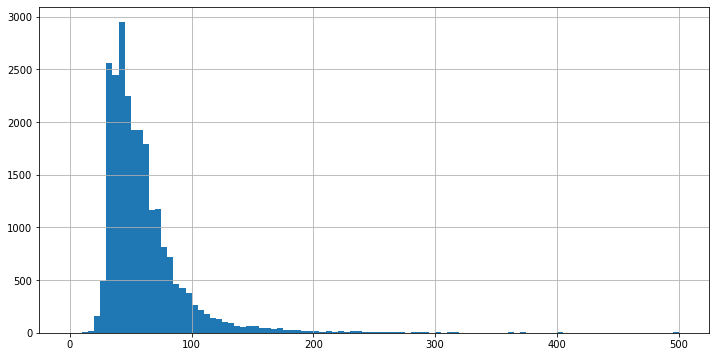

In [29]:
parameters['total_area'].hist(bins=100, range=(0, 500), figsize=(12, 6))

Гистограмма показывает, что данные соответствуют распределению Пуассона. Пик приходится на значения в диапазоне 30-40 км. м. После 300 количетсво значений незначительно относительно общего набора данных

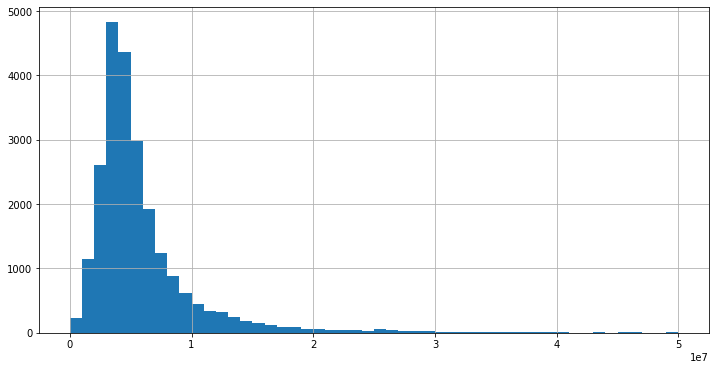

In [30]:
parameters['last_price'].hist(bins=50, range=(0, 50000000),  figsize=(12, 6))

Гистограмма цены на квартиры также соответствует распределению Пуассона. Пик приходится на значения в диапазоне 2-3 м. руб. После 30 м. руб. количетсво значений незначительно относительно общего набора данных

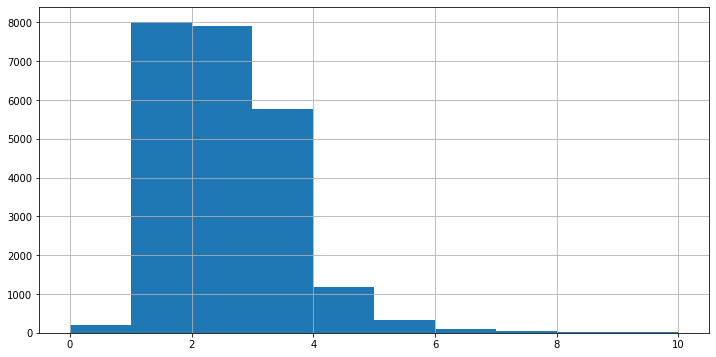

In [31]:
parameters['rooms'].hist(bins=10, range=(0, 10), figsize=(12, 6))

Основная часть данных находится в диапазоне 1-4 комнаты, после 8 количество значений практически отсутствует

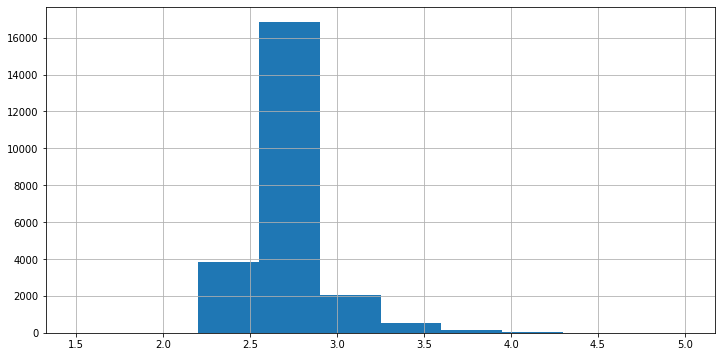

In [32]:
parameters['ceiling_height'].hist(bins=10, range=(1.5, 5), figsize=(12, 6))

Основная часть данных находится в диапазоне 2.2-3.5 м, после 4 количество значений практически отсутствует. Рассмтрим матрицу зависимости между parameters

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f034735a890>,
      dtype=object)

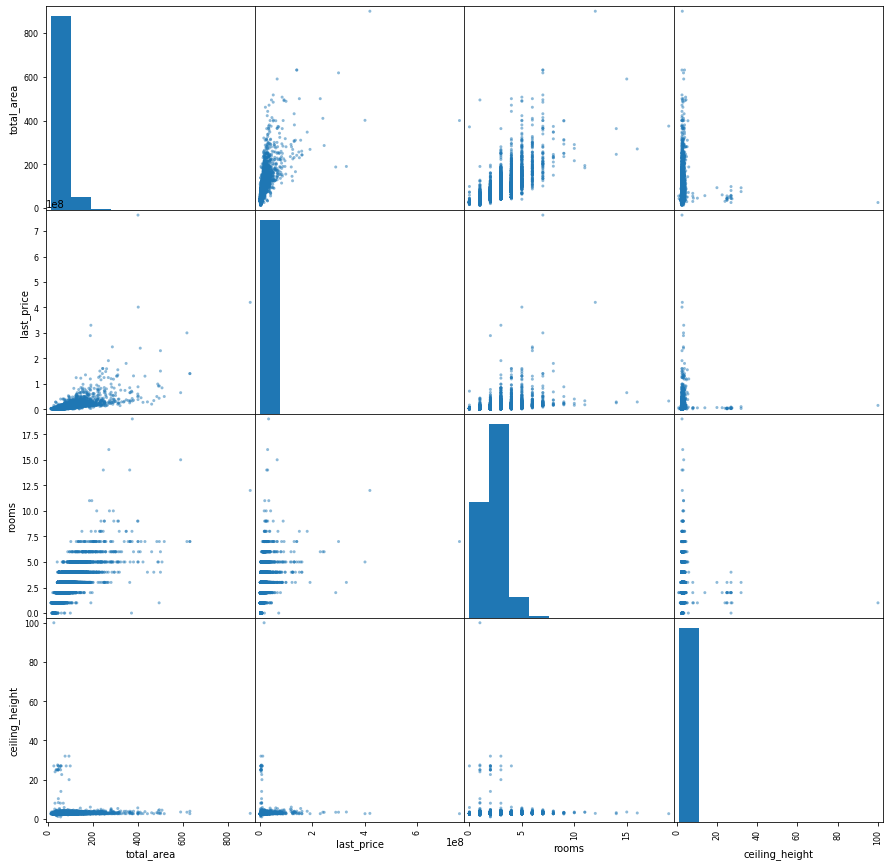

In [33]:
pd.plotting.scatter_matrix(parameters, figsize=(15, 15))

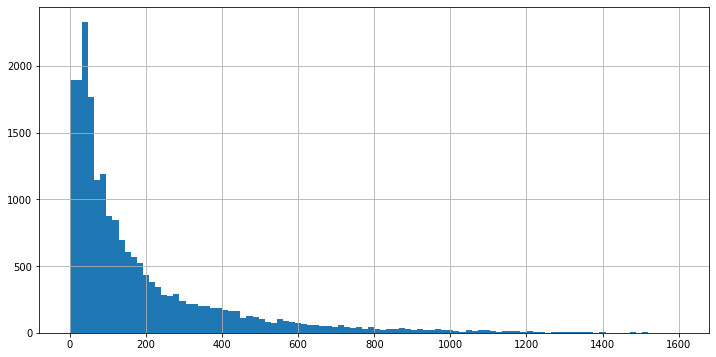

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [34]:
df['days_exposition'].hist(bins=100, range=(0, 1600), figsize=(12, 6))
plt.show()
df['days_exposition'].describe()

Гистограмма показывает, что данные соответствуют распределению Пуассона. Пик приходится на значения в диапазоне 50 дней. После 1200 количетсво значений незначительно относительно общего набора данных. Распределение подсказывает, что значения, которые находятся в первом квартиле, можно описать как очень быстрые продажи (менее 45 дней). В свою очередь, продажи свыше 231 дня после объявления считаются долгими

In [35]:
df_sorted = df.query('total_area < 300 and last_price < 30000000 and 1 <= rooms <= 8 and 2 < ceiling_height <= 4 and (living_per_total + kitchen_per_total) <= 1')
df_sorted.describe()

,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floor,floors_total,days_exposition,cityCenters_nearest,price_per_meter,living_per_total,kitchen_per_total
count,2.276600e+04,22766.000000,22766.000000,22766.000000,22766.000000,22766.000000,22766.000000,22766.000000,19730.000000,17508.000000,22766.000000,22766.000000,22766.000000
mean,5.747381e+06,58.398976,33.289653,10.212740,2.056356,2.688791,5.853114,10.647501,180.145869,14381.112320,96092.533412,0.560331,0.186884
std,3.983546e+06,26.971382,17.885141,4.953352,0.991080,0.197754,4.856920,6.568854,218.665887,8618.366579,35778.193512,0.102244,0.069892
min,1.219000e+04,13.000000,2.000000,1.300000,1.000000,2.200000,1.000000,1.000000,1.000000,208.000000,111.834862,0.038462,0.025381
25%,3.450000e+06,40.200000,18.400000,7.200000,1.000000,2.600000,2.000000,5.000000,45.000000,9594.000000,76000.000000,0.489426,0.135246
50%,4.600000e+06,52.000000,30.000000,9.000000,2.000000,2.650000,4.000000,9.000000,95.000000,13188.000000,94339.622642,0.564516,0.172536
75%,6.650000e+06,68.600000,41.700000,11.500000,3.000000,2.700000,8.000000,16.000000,230.000000,16378.000000,112903.225806,0.634053,0.229167
max,2.999900e+07,290.000000,211.000000,100.700000,8.000000,4.000000,33.000000,60.000000,1580.000000,65968.000000,848484.848485,0.908439,0.724638


На основе изучения информации с гистограмм были отфильтрованы выбивающиеся значения. Кроме того, данные в столбцах приведены к их смысловому содержанию: количество комнат не менее 1, высота потолков от 2 метров, а также общая площадь больше жилой площади и площади кухни вместе взятых. Следующим шагом составим таблицу корреляций для определения факторов, влияющих на цену недвижимости

In [36]:
print('Зависимость цены от площади:', df['last_price'].corr(df['total_area']))

Зависимость цены от площади: 0.6536213939252806


In [37]:
print('Зависимость цены от числа комнат:', df['last_price'].corr(df['rooms']))

Зависимость цены от числа комнат: 0.3631905485065748


In [38]:
print('Зависимость цены от удалённости от центра:', df['last_price'].corr(df['cityCenters_nearest']))

Зависимость цены от удалённости от центра: -0.20576582455926987


In [39]:
corr_floor = df_sorted[['last_price', 'floor_group']]
def floor_num(row):
    floor = row['floor_group']
    if floor == 'Первый':
        return 1
    if floor == 'Другой':
        return 2
    return 3

corr_floor.loc[:, 'floor_num'] = corr_floor.apply(floor_num, axis=1)
print('Зависимость цены от расположения квартиры:', corr_floor['last_price'].corr(corr_floor['floor_num']))

Зависимость цены от расположения квартиры: 0.05578823465692266


In [40]:
corr_day = df_sorted[['last_price', 'first_day_exposition']]
corr_day.loc[:, 'weekday'] = corr_day.loc[:, 'first_day_exposition'].dt.weekday
corr_day.loc[:, 'month'] = corr_day.loc[:, 'first_day_exposition'].dt.month
corr_day.loc[:, 'year'] = corr_day.loc[:, 'first_day_exposition'].dt.year

print('Зависимость цены от дня недели размещения:', corr_day['last_price'].corr(corr_day['weekday']))
print('Зависимость цены от месяца размещения:', corr_day['last_price'].corr(corr_day['month']))
print('Зависимость цены от года размещения:', corr_day['last_price'].corr(corr_day['year']))

Зависимость цены от дня недели размещения: -0.022088005798437806
Зависимость цены от месяца размещения: 0.006942619624787326
Зависимость цены от года размещения: -0.037565319540524826


Таким образом, были получены следующие результаты:
1. Зависимость цены от площади: 0.65. В данном случае можно сказать о наличии зависимости. Чем больше площать квартиры, тем она дороже; 
2. Зависимость цены от числа комнат: 0.36. Корреляция между ценой и числом комнат также есть, но не такая сильная, как между ценой и площадью. Тем не менее, можно утверждать, что чем больше комнат в квартире, тем она дороже;
3. Зависимость цены от удалённости от центра: -0.21. В данном случае есть слабая обратная зависимость между показателями. Вероятно, это объясняется тем, что в центре находятся не самые дорогие объявления о продаже недвижимости. Скорее всего, на продаже стоят загородные коттеджи, таунхаусы и т.д. (Санкт-Петербург всё таки);
4. Зависимость цены от расположения квартиры: 0.05. В данном показателе, как и тех, что ниже, взаимосвязь с ценой размещения практически отсутствует. Людям не важно, на каком этаже находится квартира и тем более неавжно, в какой день недели или месяц ее покупать. А вот год подсказывает, что со временем цена на недвижимость в этом регионе практически не изменилась (даже незначительно снизилась).
5. Зависимость цены от дня недели размещения: -0.02
6. Зависимость цены от месяца размещения: 0.01
7. Зависимость цены от года размещения: -0.04

Выберим 10 населенных пунктов с наибольшим числом объявлений. Далее посчитаем среднюю цену квадратного метра в этих населенных пунктах, выделим пункты с самой высокой и низкой стоимостью жилья

In [41]:
top10 = (df_sorted
         .pivot_table(index='locality_name', values='price_per_meter', aggfunc=('mean', 'count'))
         .sort_values(by='count', ascending=False).head(10)
)
top10

,count,mean
locality_name,,
Санкт-Петербург,15050,110268.389007
посёлок Мурино,474,84757.193482
посёлок Шушары,433,78222.721793
Всеволожск,385,68624.724211
Пушкин,366,103063.039015
Колпино,335,75295.341066
посёлок Парголово,322,90248.786836
Гатчина,302,68636.425344
деревня Кудрово,273,92121.649272


Как видно из полученных результатов, самая высокая цена за квадратный метр из 10 самых популярных мест продажи недвижимости - Санкт-Петербург со средней ценой в 110 тыс.руб. Следом расположился Пушкин с 103 тыс.руб. Самая низкая цена из списка у Выборга - 57.8 тыс.руб. Теперь изучим предложения квартир в зависимости от расстояния от центра в километрах и установим границу удаленности от центра Санкт-Петербурга

In [42]:
df_sorted.loc[:, 'center_km'] = df_sorted.loc[:, 'cityCenters_nearest'].round()
df_sorted.loc[:, 'center_km'] = df_sorted.loc[:, 'center_km'] / 1000
df_sorted.loc[:, 'price_per_km'] = df_sorted.loc[:, 'last_price'] / df_sorted.loc[:, 'center_km']
df_sorted.head()

,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floor,floors_total,first_day_exposition,days_exposition,locality_name,cityCenters_nearest,total_area_group,price_per_meter,floor_group,living_per_total,kitchen_per_total,center_km,price_per_km
0,13000000.0,108.0,51.0,25.0,3,2.70,8,16,2019-03-07,NaN,Санкт-Петербург,16028.0,80 - 150 кв.м.,120370.370370,Другой,0.472222,0.231481,16.028,8.110806e+05
1,3350000.0,40.4,18.6,11.0,1,2.65,1,11,2018-12-04,81.0,посёлок Шушары,18603.0,20 - 50 кв.м.,82920.792079,Первый,0.460396,0.272277,18.603,1.800785e+05
2,5196000.0,56.0,34.3,8.3,2,2.65,4,5,2015-08-20,558.0,Санкт-Петербург,13933.0,50 - 80 кв.м.,92785.714286,Другой,0.612500,0.148214,13.933,3.729276e+05
4,10000000.0,100.0,32.0,41.0,2,3.03,13,14,2018-06-19,121.0,Санкт-Петербург,8098.0,80 - 150 кв.м.,100000.000000,Другой,0.320000,0.410000,8.098,1.234873e+06
5,2890000.0,30.4,14.4,9.1,1,2.65,5,12,2018-09-10,55.0,городской посёлок Янино-1,NaN,20 - 50 кв.м.,95065.789474,Другой,0.473684,0.299342,NaN,NaN


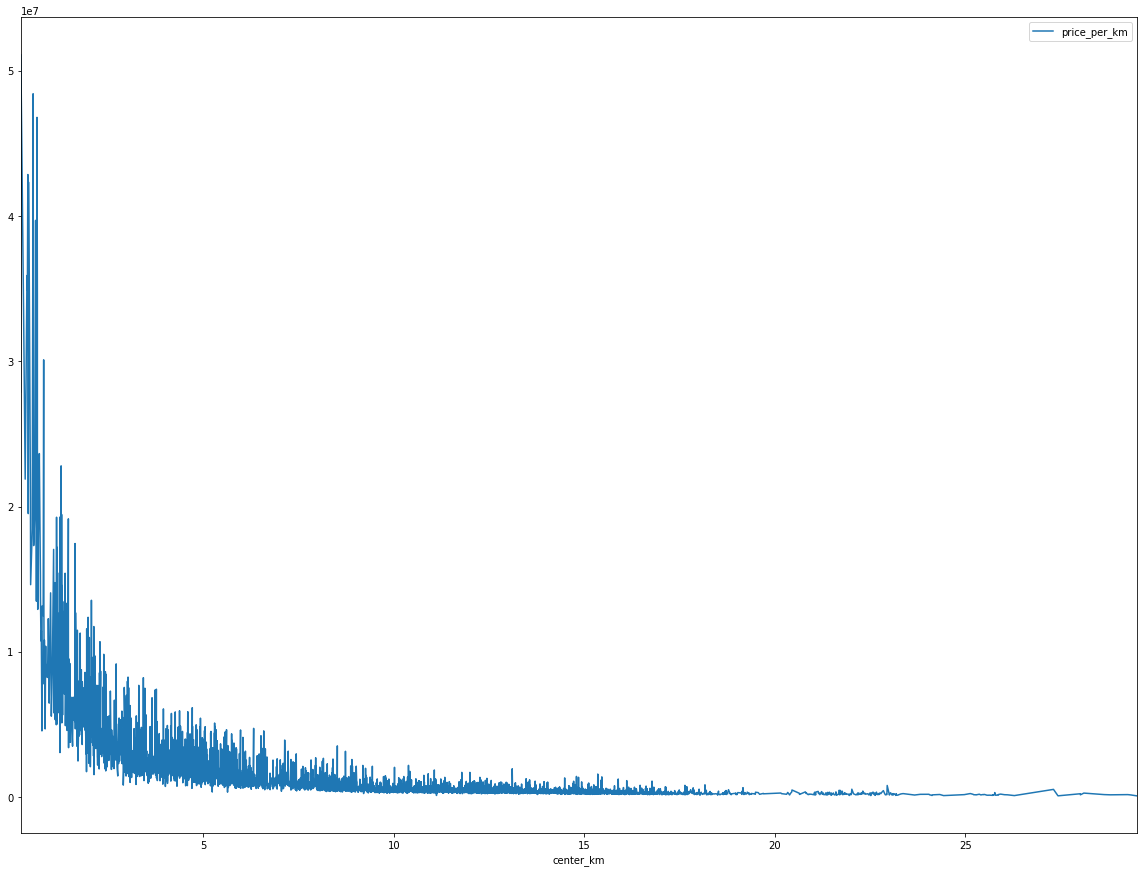

In [43]:
spb_km_price = (df_sorted
                .query('locality_name == "Санкт-Петербург"')
                .pivot_table(index='center_km', values='price_per_km')
)
spb_km_price.sort_values('center_km').plot(y='price_per_km', figsize=(20, 15))

Как видно из результатов, чем ближе к центру, тем дороже обходится каждый километр. Так, в пределах 1 километра цена доходит до 50 млн. руб., а после 10 километра зависимость цены сходит на нет. Согласно полученной информации, граница центральной зоны проходит в 3 км от начальной точки отсчета. Рассмтрим параметры этой зоны более детально: площадь, цена, число комнат, высота потолков.

In [44]:
spb_center = df_sorted.query('locality_name == "Санкт-Петербург" and center_km <= 3')
spb_center.describe() #характеристика параметров центральной зоны СПБ

,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floor,floors_total,days_exposition,cityCenters_nearest,price_per_meter,living_per_total,kitchen_per_total,center_km,price_per_km
count,5.490000e+02,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,459.000000,549.000000,549.000000,549.000000,549.000000,549.000000,5.490000e+02
mean,1.107546e+07,91.384372,56.372951,13.769545,3.058288,3.039982,3.014572,4.761384,255.989107,1885.402550,128187.342129,0.606791,0.162943,1.885403,7.546612e+06
std,5.288357e+06,41.078543,29.810851,7.731780,1.318132,0.378782,1.369562,1.065159,276.590221,686.139223,62469.813961,0.104003,0.082961,0.686139,7.112566e+06
min,2.385000e+06,13.000000,9.000000,3.000000,1.000000,2.500000,1.000000,2.000000,3.000000,208.000000,28919.631094,0.208333,0.025381,0.208000,8.215639e+05
25%,7.370000e+06,64.000000,36.000000,9.000000,2.000000,2.650000,2.000000,4.000000,65.500000,1310.000000,95613.048369,0.543939,0.109166,1.310000,3.570100e+06
50%,9.500000e+06,83.000000,50.000000,11.400000,3.000000,3.000000,3.000000,5.000000,143.000000,2004.000000,115120.274914,0.616000,0.141994,2.004000,5.471125e+06
75%,1.370000e+07,110.000000,69.300000,16.000000,4.000000,3.300000,4.000000,5.000000,368.500000,2427.000000,141666.666667,0.682148,0.187500,2.427000,8.801498e+06
max,2.990000e+07,281.100000,200.000000,56.200000,8.000000,4.000000,7.000000,8.000000,1477.000000,2999.000000,848484.848485,0.848485,0.559676,2.999000,6.766917e+07


In [45]:
df_sorted.describe() #характеристика параметров всего датасета (отфильтрованного)

,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floor,floors_total,days_exposition,cityCenters_nearest,price_per_meter,living_per_total,kitchen_per_total,center_km,price_per_km
count,2.276600e+04,22766.000000,22766.000000,22766.000000,22766.000000,22766.000000,22766.000000,22766.000000,19730.000000,17508.000000,22766.000000,22766.000000,22766.000000,17508.000000,1.750800e+04
mean,5.747381e+06,58.398976,33.289653,10.212740,2.056356,2.688791,5.853114,10.647501,180.145869,14381.112320,96092.533412,0.560331,0.186884,14.381112,8.982074e+05
std,3.983546e+06,26.971382,17.885141,4.953352,0.991080,0.197754,4.856920,6.568854,218.665887,8618.366579,35778.193512,0.102244,0.069892,8.618366,1.925140e+06
min,1.219000e+04,13.000000,2.000000,1.300000,1.000000,2.200000,1.000000,1.000000,1.000000,208.000000,111.834862,0.038462,0.025381,0.208000,1.328466e+03
25%,3.450000e+06,40.200000,18.400000,7.200000,1.000000,2.600000,2.000000,5.000000,45.000000,9594.000000,76000.000000,0.489426,0.135246,9.594000,2.640887e+05
50%,4.600000e+06,52.000000,30.000000,9.000000,2.000000,2.650000,4.000000,9.000000,95.000000,13188.000000,94339.622642,0.564516,0.172536,13.188000,3.924928e+05
75%,6.650000e+06,68.600000,41.700000,11.500000,3.000000,2.700000,8.000000,16.000000,230.000000,16378.000000,112903.225806,0.634053,0.229167,16.378000,7.655926e+05
max,2.999900e+07,290.000000,211.000000,100.700000,8.000000,4.000000,33.000000,60.000000,1580.000000,65968.000000,848484.848485,0.908439,0.724638,65.968000,6.766917e+07


Из полученных таблиц можно сделать следующие выводы:
1. Средняя цена в центральной зоне выше в 1.93 раза по сравнению с исходными данными. При этом стандартное отклонение выше, что связано с меньшим количеством объявлений и, вероятно, более высоким разбросом цен;
2. Средняя площадь в центральной зоне выше в 1.57 раз, стандартное отклонение также превышает значения исходной таблицы;
3. Если среднее количество комнат в df ~ 2, то в центральной зоне это значение около 3;
4. Средняя высота потолков также отличается - 3 м. центре города против 2.68 м. во всей выборке.

Изучим взаимосвязь цены и таких факоров, как этаж, удаленность от центра и дата размещения и сравним с выводами по начальному датасету

In [46]:
print('Зависимость цены в центре города от удалённости от центра:', spb_center['last_price'].corr(spb_center['cityCenters_nearest']))

Зависимость цены в центре города от удалённости от центра: -0.10775892796446046


In [47]:
corr_floor_center = spb_center[['last_price', 'floor_group']]
corr_floor_center.loc[:, 'floor_num'] = corr_floor_center.apply(floor_num, axis=1)

print('Зависимость цены в центре города от расположения квартиры:', corr_floor_center['last_price'].corr(corr_floor_center['floor_num']))

Зависимость цены в центре города от расположения квартиры: 0.05865164088611556


In [48]:
corr_day_cetner = spb_center[['last_price', 'first_day_exposition']]
corr_day_cetner.loc[:, 'weekday'] = corr_day_cetner.loc[:, 'first_day_exposition'].dt.weekday
corr_day_cetner.loc[:, 'month'] = corr_day_cetner.loc[:, 'first_day_exposition'].dt.month
corr_day_cetner.loc[:, 'year'] = corr_day_cetner.loc[:, 'first_day_exposition'].dt.year

print('Зависимость цены в центре города от дня недели размещения:', corr_day_cetner['last_price'].corr(corr_day_cetner['weekday']))
print('Зависимость цены в центре города от месяца размещения:', corr_day_cetner['last_price'].corr(corr_day_cetner['month']))
print('Зависимость цены в центре города от года размещения:', corr_day_cetner['last_price'].corr(corr_day_cetner['year']))

Зависимость цены в центре города от дня недели размещения: -0.05007639692218921
Зависимость цены в центре города от месяца размещения: -0.06536796293622574
Зависимость цены в центре города от года размещения: 0.01885466325566625


На выходе получаем следующие выводы:
1. Зависимость цены в центре города от удалённости от центра: -0.011 (в df_sorted -0.21). Связь вышла еще слабее по сравннению с исходным датасетом, но она также обратная. В данном случае можно говорить о практически полном отсутствии взаимозависимости;
2. Зависимость цены в центре города от расположения квартиры: 0.06 (в df_sorted 0.05). Связь незначительно выше, чем в начальной таблице, но она также отсутствует. Людям не важно, на каком этаже находится квартира и тем более неавжно, в какой день недели или месяц ее покупать;
3. Зависимость цены в центре города от дня недели размещения: -0.05 (в df_sorted -0.02);
4. Зависимость цены в центре города от месяца размещения: -0.07 (в df_sorted 0.01);
5. Зависимость цены в центре города от года размещения: 0.02 (в df_sorted -0.04)

### 5. Общий вывод

В рамках данного проекта:

1. Проанализирован исходный датасет;
2. Определены и заполнены пропущенные значения;
3. Дубликаты в таблице не обнаружены;
4. Типы данных изменены: floors_total на int, first_day_exposition на datetime;
5. Добавлены в таблицу: цена квадратного метра, дата публикации объявления, сгруппированы этажи квартир, соотношения площадей в объявлениях;
6. Проанализированы статистические характеристики исходного датасета и построены гистограммы, изучено время продажи квартир;
7. Отфильртованы редкие и выбивающиеся значения;
8. Определены факторы влияния на стоимость квартиры;
9. Выделены населённые пункты с самой высокой и низкой стоимостью жилья;
10. Определена центральная зона Санкт-Петербурга на основе изменения средней стоимости в зависимости от удаленности от центра;
11. Также, как и в исходном датасете, были проанализированы параметры и факторы влияния в центральной зоне Санкт-Петербурга и выделены отличия от предыдущих выводов.